# Signal and Image Processing (SIP_SS23)

### Research Group Neuroinformatics, Faculty of Computer Science,
### University of Vienna



Lecturer: Prof. Moritz GROSSE-WENTRUP

Tutorial by: Sadiq A. ADEDAYO <sadiq.adedayo@univie.ac.at> <br> 
$\quad\quad\quad\quad$ Jakob PRAGER <jakob.prager@univie.ac.at>

In [174]:
import numpy as np

###  Huffman coding

Huffman coding is one of several entropy encoding methods that aims to represent more common symbols by using fewer bits, while using more bits for lesser frequent symbols. Huffman coding creates a tree structure by repeatingly fusing the least frequent nodes together and assigning 1 or 0 to the branches. <br>
Huffman coding is uniquely decodable.


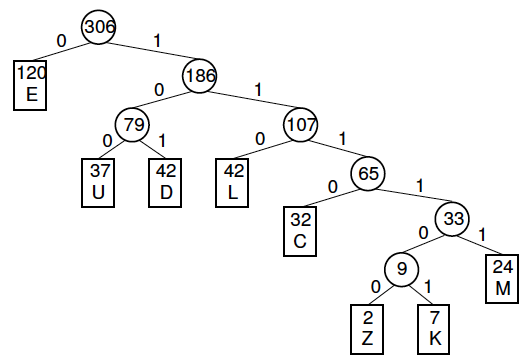

We want to encode a given string of characters using Huffman coding. <br>
(You can insert any text you like)

In [160]:
text = 'Fischers Fritz fischt frische Fische.'

Huffman coding needs us to know the probabilites of all the characters in advance, so we first we define <br>
a function to calculate the frequency of each character in the text and save it in a dictionary.


In [161]:
#count the characters in an ordered set
char_cnt_func = lambda string: dict((char, string.count(char)) for char in set(string))

In [162]:
#apply function
cnt_dict = char_cnt_func(text)

Now that we have the frequency of all characters we claculate the probability of each character.

In [163]:
# calculate and order cahracters by probabilites 
n_char = sum(cnt_dict.values())
char_prob = {char: cnt_dict[char] / n_char for char in sorted(cnt_dict, key=cnt_dict.get)}
char_prob

{'.': 0.02702702702702703,
 'z': 0.02702702702702703,
 'f': 0.05405405405405406,
 't': 0.05405405405405406,
 'e': 0.08108108108108109,
 'F': 0.08108108108108109,
 'r': 0.08108108108108109,
 'c': 0.10810810810810811,
 ' ': 0.10810810810810811,
 'h': 0.10810810810810811,
 's': 0.13513513513513514,
 'i': 0.13513513513513514}

## Creating the huffman tree

We create a function that follows the algorithm shown in class and constructs the huffman tree. 

It follows this pseudocode:

function huffman(probability table): <br>
• 1. Convergence? I.e., only one pair of string is left in the table . à Assign 0 and 1. <br>
• 2. Find the pair of strings with lower probability, e.g., s_1 and s_2 <br>
• 3. Merge them into one new string and compute the corresponding probability, i.e., s_new = s_1 + s_2 <br>
• 4. Update the table with new string s_new <br>
• 5. Further merge this new table until convergence (I.e., repeat 1-4) <br>
• 6. Retrieve the huffman code for the new string s_new <br>
• 7. Append 0 and 1 to the code for s_new, which is the huffman code for s_1 and s_2 respectively. <br>
• return huffman code of this probability table

In [172]:
#========================================
# Author     : Jiachen Xu
# Blog       : www.jiachenxu.net
# Time       : 2020-06-22 15:23:04
# Name       : huffman.py
# Version    : V1.0
#========================================


def huffman(str_dict):

    # str_dict = {string: probability}
    assert abs(sum(str_dict.values())-1.0) < 1e-6,  "The sum of probablities is not equal to 1."

    assert len(str_dict) >= 2, "The table contains less than two strings."
    
    # 1. Convergence?
    if len(str_dict) == 2:
        return dict(zip(str_dict.keys(), ['0', '1']))

    merged_str_dict = str_dict.copy()

    # 2. Find the pair of string with lowest probability
    str_1, str_2 = sorted(str_dict, key=str_dict.get)[:2]
    

    # 3. Merge into new string and compute the probability
    # 4. Update the dictionary (table)
    prob_str_1 = merged_str_dict.pop(str_1)
    prob_str_2 = merged_str_dict.pop(str_2)

    merged_str = str_1 + str_2
    merged_str_dict[merged_str] = prob_str_1 + prob_str_2

    # 5&6. Further construct the huffman tree and retrieve the huffman code for
    # this updated table

    huffman_code = huffman(merged_str_dict)
    
    # 7. Append 0& 1 to the huffman code for the updated table
    code_merged_str = huffman_code.pop(merged_str)
    huffman_code[str_1] = code_merged_str + '0'
    huffman_code[str_2] = code_merged_str + '1'

    return huffman_code

In [165]:
codebook = huffman(char_prob)
codebook

{'s': '100',
 'i': '101',
 'h': '010',
 'c': '000',
 ' ': '001',
 'F': '1110',
 'r': '1111',
 'e': '1101',
 'f': '0110',
 't': '0111',
 '.': '11000',
 'z': '11001'}

To encode a message we now only need to get the respective code for each character and put the in a list

In [170]:
def encode(text, codebook):
    code = []
    for x in text:
        code.append(codebook[x])
    return code

In [171]:
code = encode(text, codebook)
code

['1110',
 '101',
 '100',
 '000',
 '010',
 '1101',
 '1111',
 '100',
 '001',
 '1110',
 '1111',
 '101',
 '0111',
 '11001',
 '001',
 '0110',
 '101',
 '100',
 '000',
 '010',
 '0111',
 '001',
 '0110',
 '1111',
 '101',
 '100',
 '000',
 '010',
 '1101',
 '001',
 '1110',
 '101',
 '100',
 '000',
 '010',
 '1101',
 '11000']

### Bonus task: <br>
It is relativly easy to decode a message as long as you have a the binary huffman value for each character. Given a dictionary, try to decode the following code.

In [168]:
huffman_codes = {'e': '010',' ': '011','d': '000','s': '001','Y': '1010','a': '1000','o': '1001','u': '11110','!': '11111','i': '11100',
 'h': '11101','y': '11010','m': '11011','c': '11000','t': '11001','g': '10110','.': '10111'}


secret_message = ['1010','1000', '11010','11111','011','1010','1001','11110','011','000','010','11000','1001','000','010','000','011','11001','11101','11100',
 '001','011','11011','010','001','001','1000','10110','010','10111']



In [173]:
#will be removed for lecture

#function to get keys
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

# decode
def decode(code, huffman_codes):
    message = []
    for x in code:
        message.append(get_keys_from_value(huffman_codes, x))
    return message

decode(secret_message, huffman_codes)

[['Y'],
 ['a'],
 ['y'],
 ['!'],
 [' '],
 ['Y'],
 ['o'],
 ['u'],
 [' '],
 ['d'],
 ['e'],
 ['c'],
 ['o'],
 ['d'],
 ['e'],
 ['d'],
 [' '],
 ['t'],
 ['h'],
 ['i'],
 ['s'],
 [' '],
 ['m'],
 ['e'],
 ['s'],
 ['s'],
 ['a'],
 ['g'],
 ['e'],
 ['.']]